# Introduction to NLP Fundamentals in Tensorflow

NLP has the goal of deriving information out of natural language (could be sequences, text or speech).
Another common term for NLP problem is sequence to sequence problems (seq2seq).

In [1]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-50f382b8-7112-07d6-15e4-204a47d0588d)


## Get helper functions

In [2]:
# Get helper functions (Download helper functions script from JonasHagstrom79/Tensorflow(raw))
!wget https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py

--2024-03-18 17:13:58--  https://raw.githubusercontent.com/JonasHagstrom79/Tensorflow/main/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13380 (13K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]  13.07K  --.-KB/s    in 0s      

2024-03-18 17:13:58 (118 MB/s) - ‘helper.py’ saved [13380/13380]



In [3]:
# Import
from helper import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (text sample of tweeets labelled as disaster or not disaster).
Original source [here](https://www.kaggle.com/c/nlp-getting-![2024-02-10 (7).png](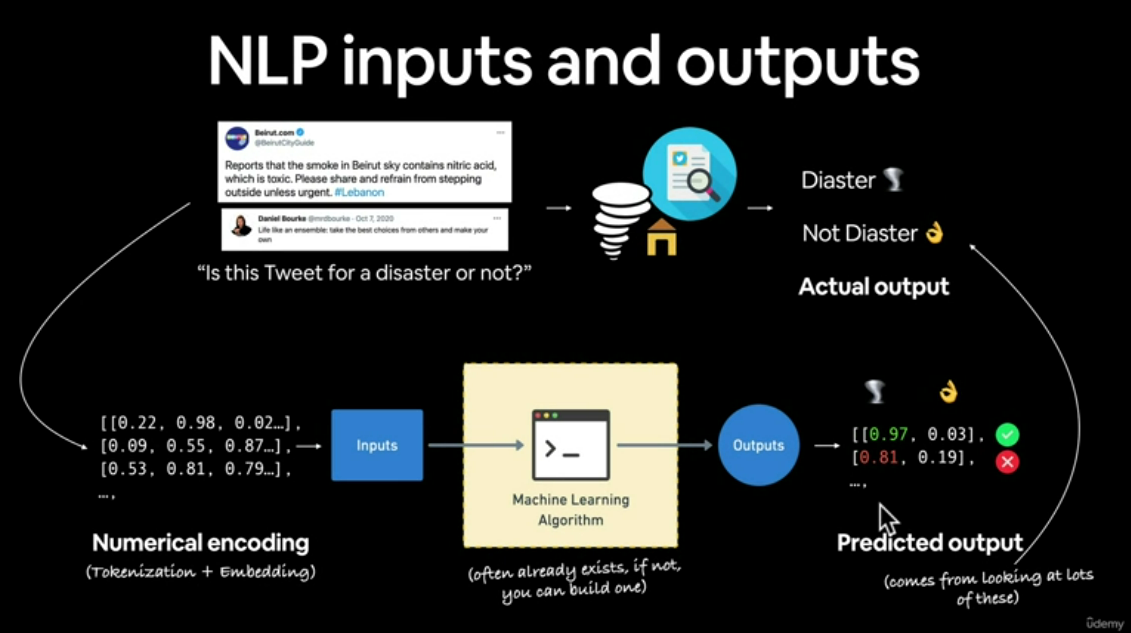![2024-02-10 (7).png](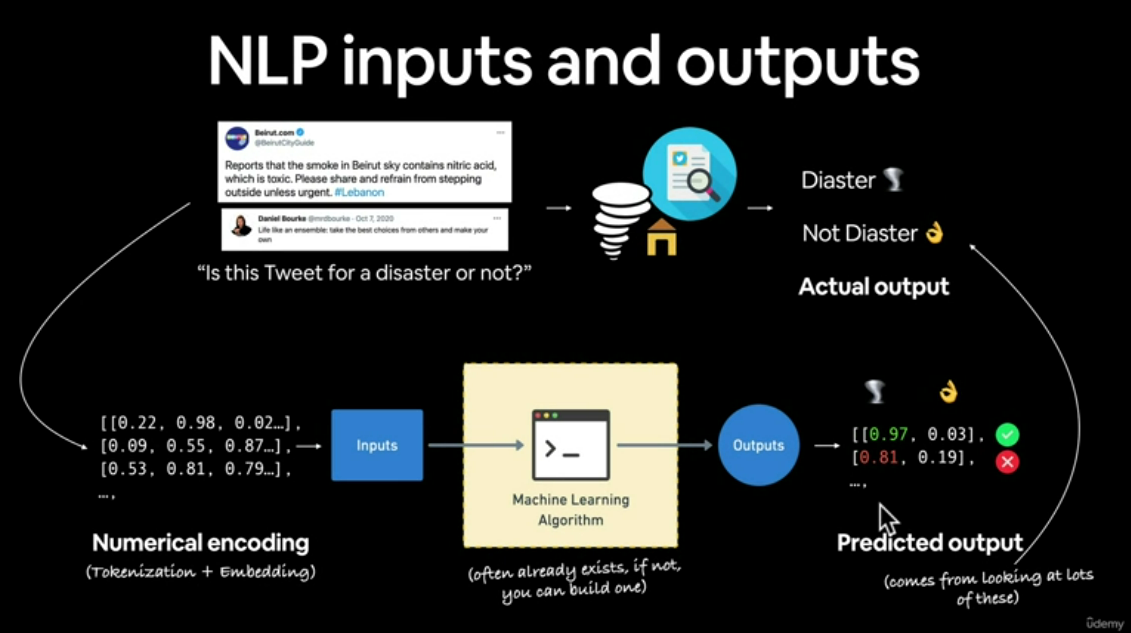![2024-02-10 (7).png](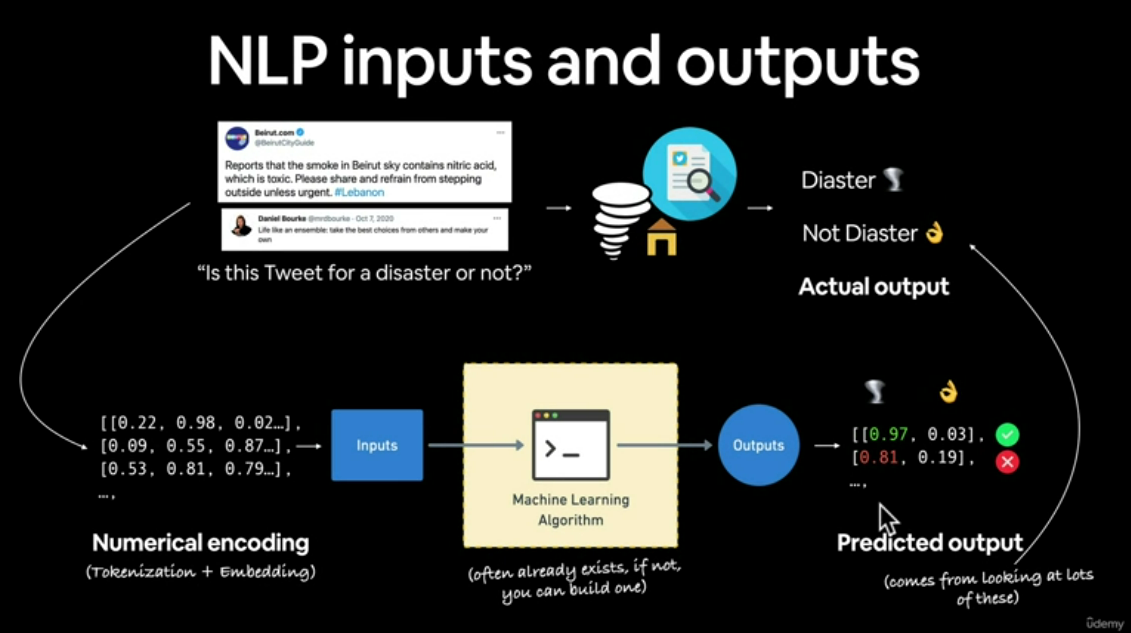![2024-02-11 (3).png](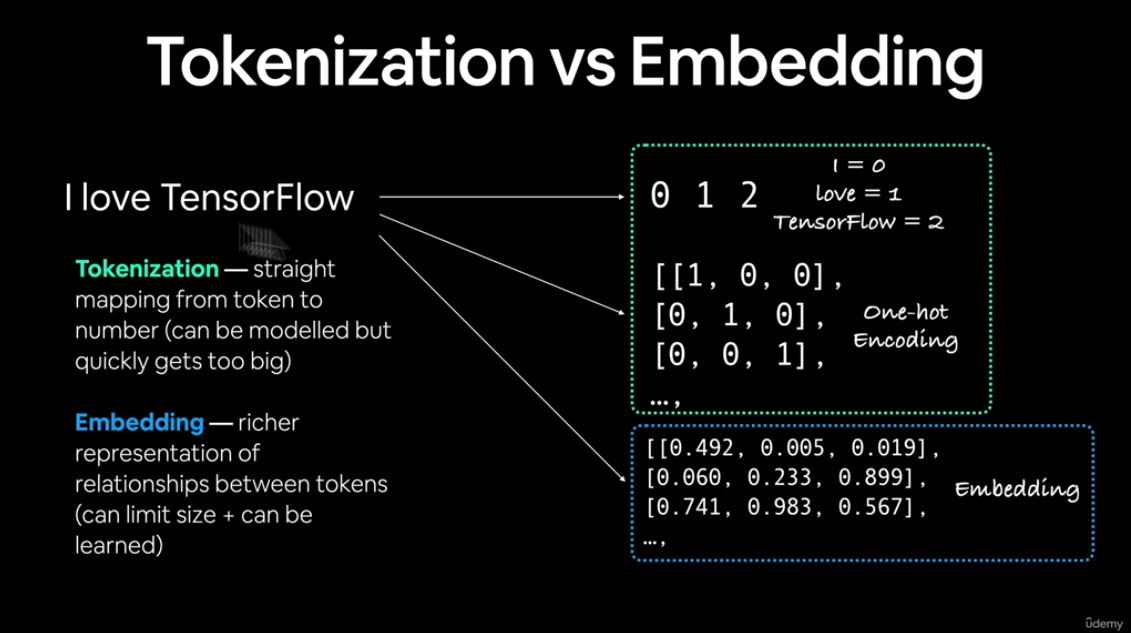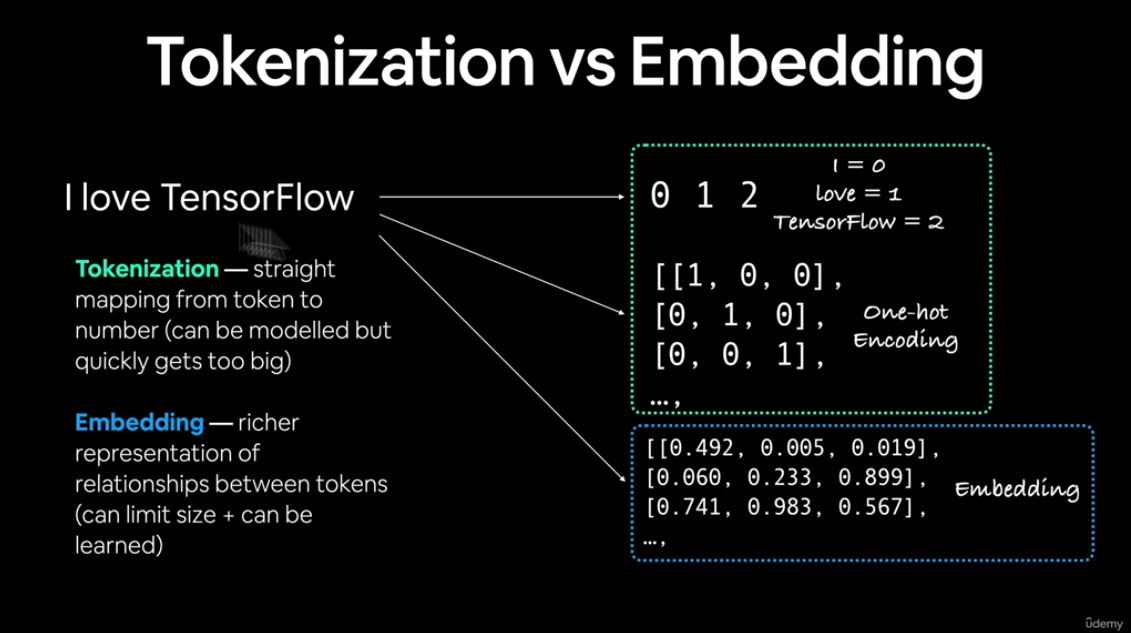))))started)

In [4]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-03-18 17:14:02--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.175.207, 74.125.24.207, 142.251.10.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.175.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   748KB/s    in 0.8s    

2024-03-18 17:14:03 (748 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [5]:
# Unzip data
unzip_data("nlp_getting_started.zip")

## Visualizing a text dataset

To visualize our text samples, we fitst have to read them in, one way to do so would be to use [python](https://realpython.com/read-write-files-python/)

I prefer to get visual straight away.

Another way to do this is to use pandas.

In [6]:
# Pandas have a methos load_csv
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [7]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

id      keyword               location  \
2644  3796  destruction                    NaN   
2227  3185       deluge                    NaN   
5448  7769       police                     UK   
132    191   aftershock                    NaN   
6845  9810       trauma  Montgomery County, MD   

                                                   text  target  
2644  So you have a new weapon that can cause un-ima...       1  
2227  The f$&amp;@ing things I do for #GISHWHES Just...       0  
5448  DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...       1  
132   Aftershock back to school kick off was great. ...       0  
6845  in response to trauma Children of Addicts deve...       0

In [8]:
# What does the test dataframe look like? (no target)
test_df.head()

id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan

In [9]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

The data looks balaced, shhould it not be balanced there is a [method](https://www.tensorflow.org/tutorials/structured_data/imbalanced_data) in tensorflow to fix this.

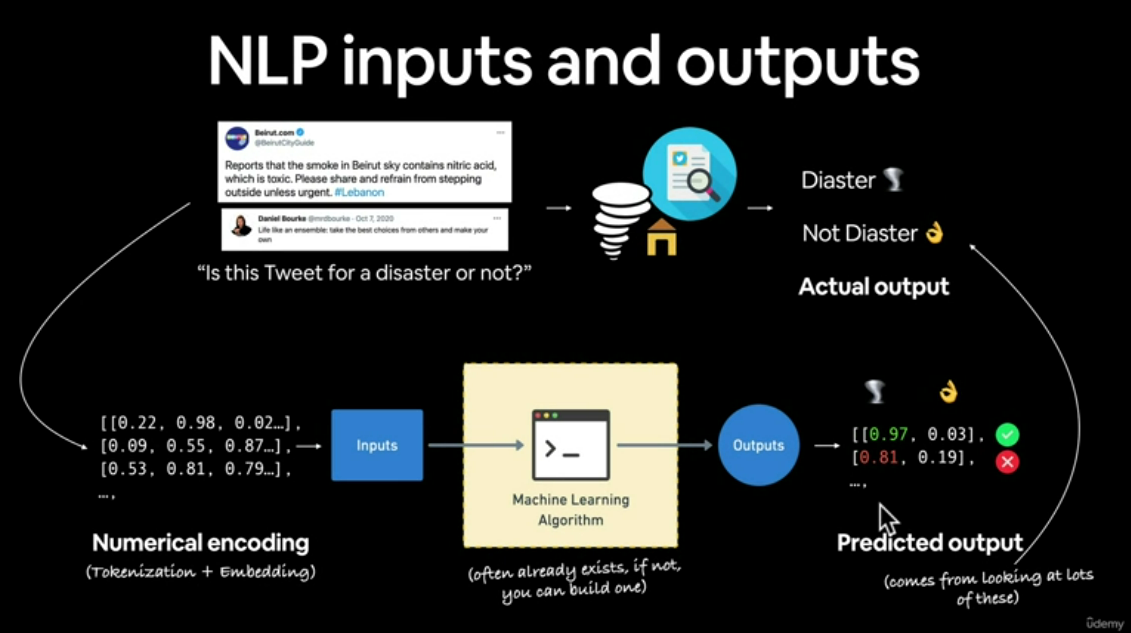placeholder picture (2024-02-10 (7).png)

In [10]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [11]:
# Lets visualize some random training examples
import random
random_index = random.randint(0, len(train_df) -5) # -5 so we dont go past the lenght of the frame
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"Text:\n{text}\n")
  print("---\n")

Target: 1 (real disaster)
Text:
Bomb head? Explosive decisions dat produced more dead children than dead bodies trapped tween buildings on that day in September there

---

Target: 1 (real disaster)
Text:
WIN: Lisowski whitewashes the Whirlwind 5-0 in round 2 of Shanghai Masters Quals! |  http://t.co/MLigPUHVOh #snooker http://t.co/TcS2Cd5y6y

---

Target: 0 (not real disaster)
Text:
I wonder how times someone has wrecked trying to do the 'stare and drive' move from 2 Fast 2 Furious

---

Target: 1 (real disaster)
Text:
Does homeowners insurance cover water damage? Here are some good things to know. http://t.co/0uSDI5JCHo http://t.co/xyg7JhRjoF

---

Target: 0 (not real disaster)
Text:
It is freezing in my room &amp; I erally want to unplug the ac but I don't want to electrocute myelf and die

---



### Split data into training and validation set

[train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
# Use train_test_split to split training data into training and validation sets
train_scentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                             train_df_shuffled["target"].to_numpy(),
                                                             test_size=0.1, # use 10% of training data for validation
                                                             random_state=42)

In [14]:
# Check the lengths
len(train_scentences), len(train_labels), len(val_sentences), len(val_labels)

(6851, 6851, 762, 762)

In [15]:
# Check the first 10 samples
train_scentences[:10], train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

## Converting text into numbers
[word embedings](https://www.tensorflow.org/text/guide/word_embeddings)

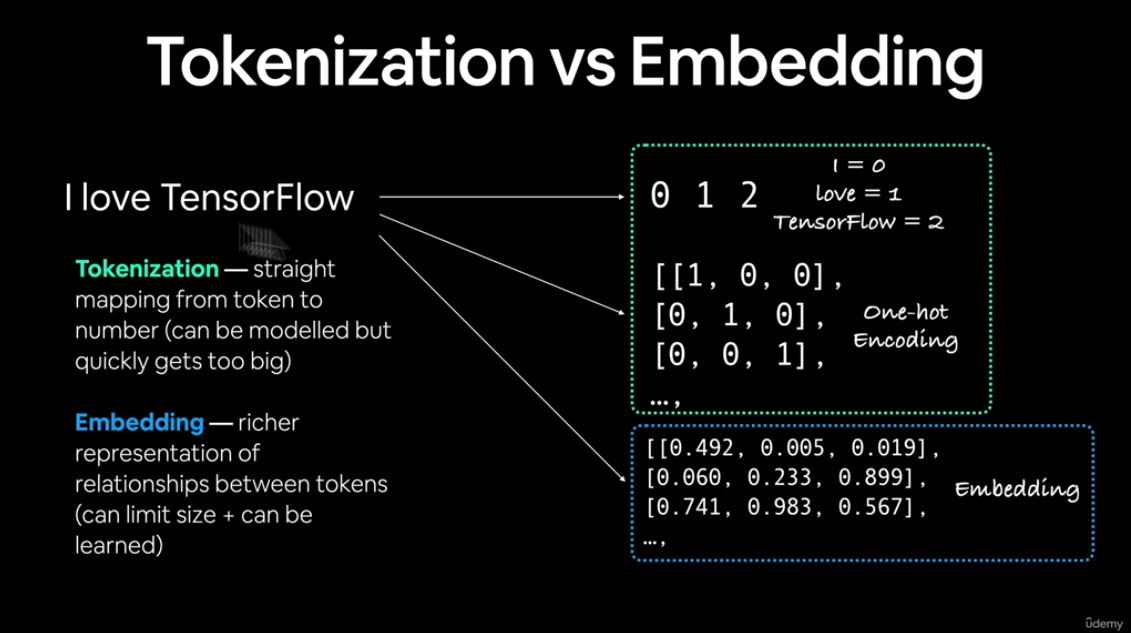placeholder (2024-02-11 (3).png)

## Converting text into numbers

When dealing with a text problem, one of the first things
you'll have to do before you can build a model to convert
your text to numbers.

There are a few ways to do this, namely:
* Tokenaziation - direct mapping of token ( a token could be a
word or charachter) to number.
* Embedding - create a matrix of feature vector for each token
(the size of features vector can be defined and this embedding can
 be learned)

## Text vectorization (tokenization)

In [16]:
train_scentences[:5]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma',
       '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
       "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
       'Somehow find you and I collide http://t.co/Ee8RpOahPk'],
      dtype=object)

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

max_vocab_length = 10000 # Max numbers of words to have in our vocabulary

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=max_vocab_length, # How many woeds in the vocabulary (automatically addd <OOV>)
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # Creates words of n-words?
                                    output_mode="int", # How to map tokens to numbers
                                    output_sequence_length=None, # How long do you want your sequences to be?
                                    pad_to_max_tokens=True)

resource: [textVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization)

In [18]:
# Find the average numbers of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_scentences])/len(train_scentences))

15

In [19]:
# Set up text vectorization variables
max_lenght = 15 # Max lenght our sequeces will be (e.g. how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int", # How to map tokens to numbers
                                    output_sequence_length=max_lenght)

In [20]:
# Fit the text vectorizer to the train text
text_vectorizer.adapt(train_scentences)

In [21]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

The sentence is only 6 words long, the 0 make up for the spaces up to 15 wich is max_lenght

In [22]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_scentences)
print(f"Original text:\n {random_sentence}\
      \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 12 Month Payday Short Catastrophe Loans - Promote Finance Your Desire lIQd      

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[ 719, 1500, 9900, 1254,  404, 5203, 4852,    1,   33, 3055,    1,
           0,    0,    0,    0]])>

In [23]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary() # Get all the uniqe words in our training data
top_5_words = words_in_vocab[:5] # Get thr most common words
bottom_5_words = words_in_vocab[-5:] # Gry yhe least common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


[UNK] stands for unknown token, its a word outside of the top 10000

### Creating an Embedding using an Embeddding Layer

To make our embedding, ew're going to use TensorFlows's embedding layer: [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding)

The parameters we care most about for our embedding layer:

* `input_dim` = the size of our vocabulary.
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represeted by a vector 100 long.
* `input_length` = length of the sequences being passed to the embedding layer.

In [24]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # Set input shape
                             output_dim=128, # Output shape, set the number by something divisible by 8 and you might se a speedupin computing
                             input_length=max_lenght # How long is each input
                             )
embedding

In [25]:
# Get a random sentence from the training set
random_sentence = random.choice(train_scentences)
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into a dense vectors of fixed size)
sample_embed = embedding(text_vectorizer([random_sentence]))
sample_embed

Original text:
 'Snowstorm' 36'x36' oil on canvas (2009) http://t.co/RCZAlRU05o #art #painting        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[-0.03685852, -0.02436391,  0.00070093, ...,  0.00956364,
          0.03950075,  0.02938342],
        [-0.04412758,  0.0206596 , -0.01937828, ...,  0.01287481,
          0.04350824, -0.02402184],
        [ 0.00493497, -0.03424603, -0.00499843, ..., -0.0383299 ,
         -0.04485063,  0.04376883],
        ...,
        [-0.01040114,  0.03768612,  0.0160722 , ..., -0.04787409,
          0.04266137, -0.01176301],
        [-0.01040114,  0.03768612,  0.0160722 , ..., -0.04787409,
          0.04266137, -0.01176301],
        [-0.01040114,  0.03768612,  0.0160722 , ..., -0.04787409,
          0.04266137, -0.01176301]]], dtype=float32)>

In [26]:
# Check out a single token's embedding
sample_embed[0][0], sample_embed[0][0].shape, random_sentence[0]

(<tf.Tensor: shape=(128,), dtype=float32, numpy=
 array([-3.68585214e-02, -2.43639108e-02,  7.00928271e-04, -4.57296520e-03,
        -3.24472561e-02, -4.24378179e-02, -4.28861864e-02, -1.31777525e-02,
         3.29699181e-02, -4.30590771e-02,  3.55356224e-02,  3.07064317e-02,
         3.07020582e-02,  9.14686918e-03, -4.69895713e-02, -8.52398947e-03,
        -4.91422899e-02,  4.71439846e-02,  1.59871019e-02, -1.37720220e-02,
        -8.84560496e-03,  4.28499617e-02, -4.36616316e-02,  2.02885307e-02,
         4.37488444e-02,  4.21880819e-02,  3.13177742e-02,  1.10118277e-02,
         6.54724985e-03,  2.61234976e-02, -2.16335058e-02,  1.96570158e-03,
        -4.87522855e-02,  3.99909951e-02,  2.96605565e-02, -2.75033955e-02,
        -4.17501852e-03,  9.66658443e-03, -5.49217314e-03, -2.57493388e-02,
        -7.99340010e-03,  9.63448361e-03,  4.85432781e-02,  4.51837219e-02,
        -5.20848110e-03,  1.98506974e-02,  3.77094187e-02, -4.39343117e-02,
         2.43127979e-02, -2.24059820e-0

## Modelling a text dataset (running a series of experiments)

Now we've got a way toturn our text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with a baseline an move on from there.

* Model 0: Naive Bayes (baseline) from [Sklearn ML](gttps://scikit-learn.org/stable/tutorial/machine_learning_map/index.html)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Didirectional_LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: TensorFlow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of training data

### Model 0: Getting a baseline

As with all machine learning modelling experiments, it's important to create a bseline model so you've got a benchmark for future experiments to build upon.

To create our baseline, we'll use Sklearn's Multinomial Naive Bayes using the TF-IDF formula to convert our words to numbers

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# Create tokenization and modelling pipeline
model_0 = Pipeline([
                    ("tfidf", TfidfVectorizer()), # convert words to numbers using tfidf
                    ("clf", MultinomialNB()) # model the text
])

# Fit the pipeline to the training data
model_0.fit(train_scentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [28]:
# Evaluate our baseline model
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [29]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

### Creating an evaluation function for our model experiments

comparing th following:
* Accuracy
* Precision
* Recall
* F1-score

For a deep overwiev se the Sklearn [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html)![rnn.png](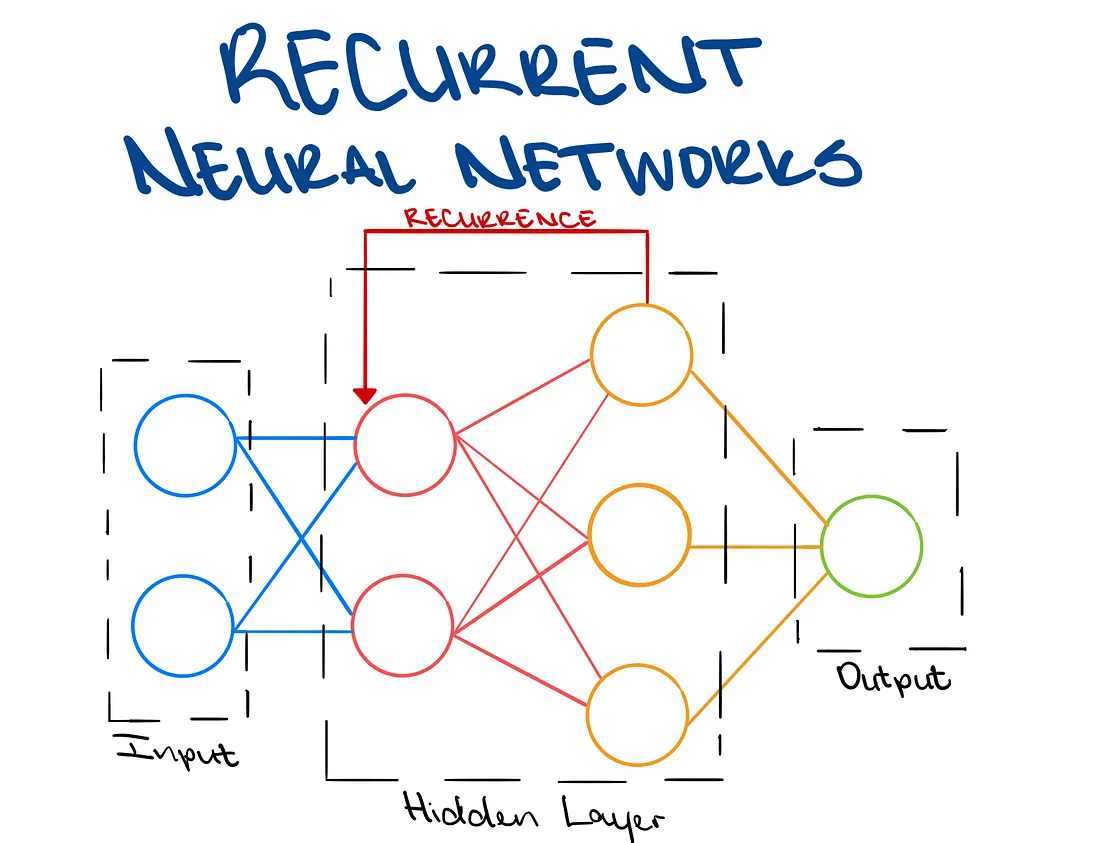![rnn.png](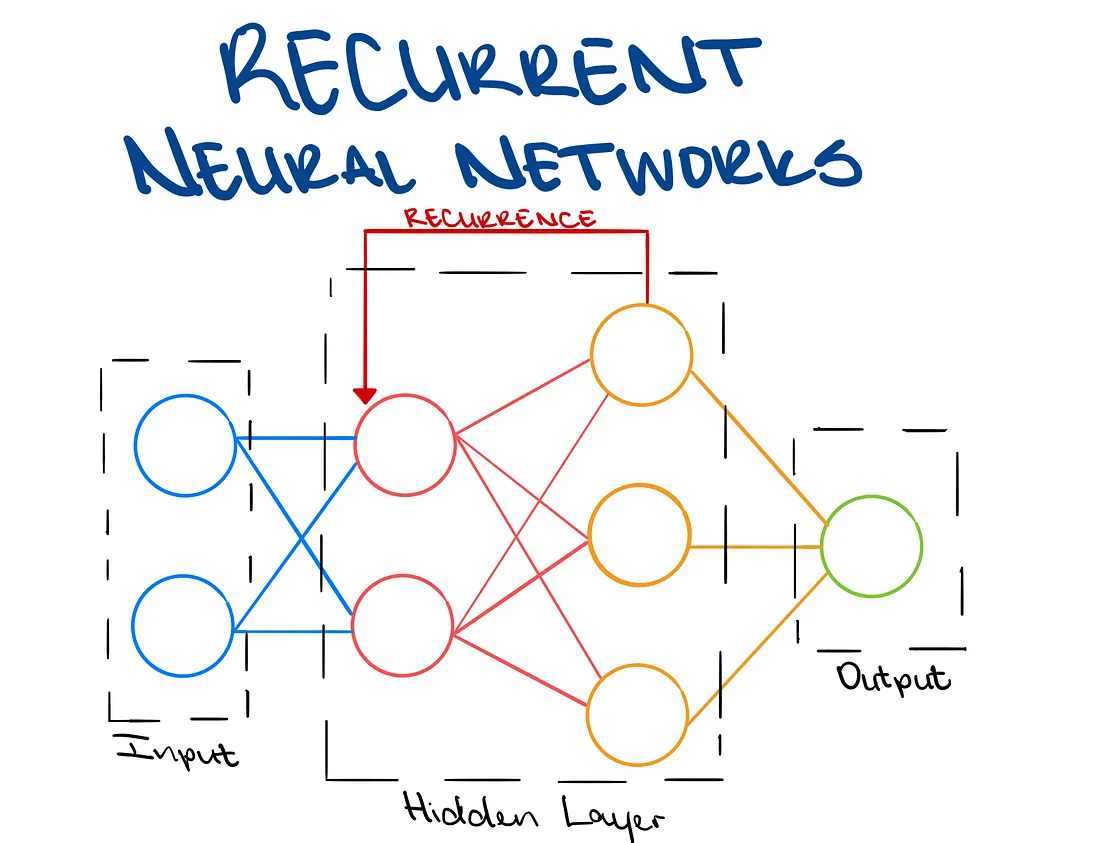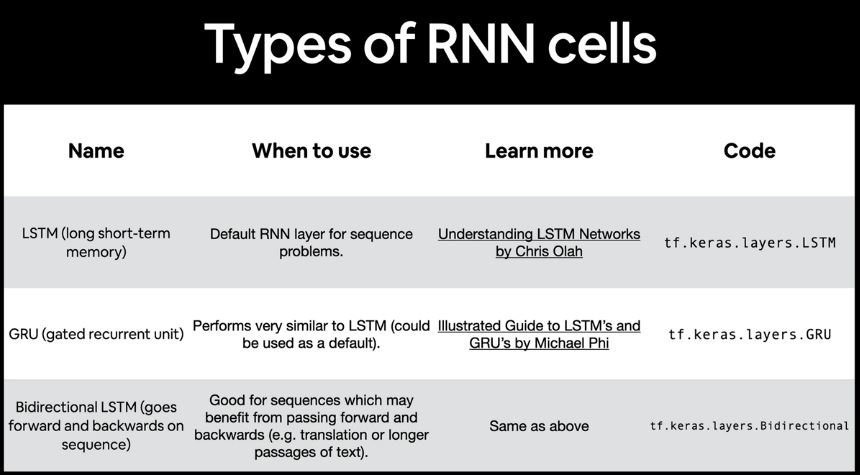))

In [30]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and F1-score of a binary classification model.
  """
  # Calculate maodel accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recll and F-score using "weighted" average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted") # _ dont want the last value (support)
  model_results = {"accuracy": model_accuracy,
                   "precision": model_precision,
                   "recall": model_recall,
                   "f1": model_f1}
  return model_results


In [31]:
# Get baseline results
baseline_results = calculate_results(y_true=val_labels,
                                     y_pred=baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 1: A simple dense model

In [32]:
# Create a tensorboard callback (need to create a new one for each model)
from helper import create_tensorboard_callback

# Create directory to save TensorBoard logs
SAVE_DIR = "model_logs"

In [33]:
# Build model with the Functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string) # inputs are 1-dimensional strings

x = text_vectorizer(inputs) # turn the input text into numbers
x = embedding(x) # create an embedding of the numberized inputs
x = layers.GlobalAveragePooling1D()(x) # lower the dimensionality of the embedding (try running the model
# x = layers.GlobalMaxPool1D()(x)
outputs = layers.Dense(1, activation='sigmoid')(x) # create the output layer, want binary outputs so use sigmoid activation

# Create the model
model_1 = tf.keras.Model(inputs, outputs, name="model_1_dense")

In [34]:
# Inspect the model
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [35]:
# Compile model
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [36]:
# Fit the model
model_1_history = model_1.fit(x=train_scentences,
                              y=train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(dir_name=SAVE_DIR,
                                                                     experiment_name="model_1_dense")])

Saving TensorBoard log files to: model_logs/model_1_dense/20240318-171407
Epoch 1/5
215/215 [==============================] - 9s 31ms/step - loss: 0.6113 - accuracy: 0.6958 - val_loss: 0.5353 - val_accuracy: 0.7625
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4403 - accuracy: 0.8181 - val_loss: 0.4669 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.3452 - accuracy: 0.8619 - val_loss: 0.4574 - val_accuracy: 0.7913
Epoch 4/5
215/215 [==============================] - 2s 7ms/step - loss: 0.2837 - accuracy: 0.8927 - val_loss: 0.4640 - val_accuracy: 0.7861
Epoch 5/5
215/215 [==============================] - 1s 5ms/step - loss: 0.2366 - accuracy: 0.9127 - val_loss: 0.4818 - val_accuracy: 0.7848


In [37]:
# Check the results
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.7848


[0.4817747175693512, 0.7847769260406494]

In [38]:
# Make some predictions and evaluate those
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs.shape

24/24 [==============================] - 0s 2ms/step


(762, 1)

In [39]:
# Everything above 0.5 will be the positive class, and negative below 0.5
model_1_pred_probs[0]

array([0.39315152], dtype=float32)

In [40]:
# Looka at the 10 first predictions
model_1_pred_probs[:10]

array([[0.39315152],
       [0.76321733],
       [0.9969631 ],
       [0.11028758],
       [0.11144616],
       [0.93775356],
       [0.91829705],
       [0.99209833],
       [0.96702844],
       [0.2471137 ]], dtype=float32)

In [41]:
# Convert model prediction probabilities to label format
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs)) # squeeze removes dimensions of size 1 from the tensor, round a prediction above .5 to 1 and below .5 to 0
model_1_preds[:20]


<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [42]:
# Calculate our model 1 results
model_1_results = calculate_results(y_true=val_labels,
                                    y_pred=model_1_preds)
model_1_results

{'accuracy': 78.4776902887139,
 'precision': 0.789165199286798,
 'recall': 0.7847769028871391,
 'f1': 0.7818959205825942}

In [43]:
# Compare to our baseline results
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Visualizing the learned embeddings

In [44]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10] # check the len and the 10 ost common words

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [45]:
# Model 1 summary
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1280129 (4.88 MB)
Trainable params: 128

In [46]:
# Get the weight matrix of embedding layer
# (these are the numerical representations of each token in our training data wich have been learned for 5 epochs)
embed_weights = model_1.get_layer("embedding").get_weights()
embed_weights

[array([[ 0.01005591,  0.05997301, -0.00632263, ..., -0.07055708,
          0.065271  , -0.03396919],
        [-0.03988536,  0.02690882, -0.02505004, ...,  0.00539648,
          0.05080868, -0.03071381],
        [-0.02844345,  0.00973695, -0.05395417, ..., -0.01279643,
         -0.00980522, -0.02369319],
        ...,
        [ 0.04191547,  0.01793262,  0.0295442 , ..., -0.00809629,
          0.01441627,  0.04612149],
        [ 0.03826133,  0.04141795, -0.07887901, ...,  0.00142912,
          0.05585865,  0.00098546],
        [ 0.05129515,  0.07320132, -0.03253226, ..., -0.02107708,
          0.09658793, -0.04910747]], dtype=float32)]

Now ew've got the embeddinng matrix our model has learned to represent our tokens, let's see how we can visualize it.

To do so, TensorFlow has a handy tool called [projector](http://projector.tensorflow.org)

And TensorFlow also has an incredible guide on [word embeddings](https://www.tensorflow.org/tutorials/text/word_embeddings)

Extra reading on [Word2vec](https://jalammar.github.io/illustrated-word2vec/) by Jay Alammar

In [47]:
# Create embedding files (from TensorFlow's word embeddings documentation)
import io

# Antag att model_1 och words_in_vocab är definierade tidigare i koden
embed_weights = model_1.get_layer("embedding").get_weights()[0]

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  if index >= len(embed_weights):  # Check that index is whitin range
    break
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")

out_v.close()
out_m.close()

In [48]:
# Download files from Colab to upload to projector
try:
  from google.colab import files
  files.download('vectors.tsv')
  files.download('metadata.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Go to [projector](http://projector.tensorflow.org) and load in the data from your download folder

## Recurrent Neural Networcs (RNN's)

RNN's are useful for sequence data.

The premise of recurrent neural network is to use the representation of previous input to aid the representation of later input.


If u want a overwiev of the internals of recurrent neural network, see the following [video](https://www.youtube.com/watch?v=SEnXr6v2ifU).

Also explore these:

[The Unreasonable Effectiveness of Recurrent Neural Networks](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) by Andrej Karpathy - demonstrates the power of RNN's with examples generating various sequences.

[Understanding LSTMs](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) by Chris Olah - an in-depth (and technical) look at the mechanics of the LSTM cell, possibly the most popular RNN building block.

### Model 2: LSTM

LSTM = Long Short Term Memory (one of the most popular LSTM cells)
Our structure of an RNN typically looks like this:
```Input (text) -> Tokenize -> Embedding -> Layers (RNNs/dense) -> Output (label probability)```

In [49]:
# Create an LSTM model
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
#print(x.shape) # the shape of the output layer
#x = layers.LSTM(64, return_sequences=True)(x) # when you are stacking RNN cells together, you need to return_sequences=True
#print(x.shape)
x = layers.LSTM(64)(x)
#print(x.shape)
#x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs, outputs, name="model_2_LSTM")



In [50]:
# Get a summary
model_2.summary()

Model: "model_2_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (5.07 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [51]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [52]:
# Fit the model
model_2_history = model_2.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_2_LSTM")])

Saving TensorBoard log files to: model_logs/model_2_LSTM/20240318-171423
Epoch 1/5
215/215 [==============================] - 9s 32ms/step - loss: 0.2186 - accuracy: 0.9225 - val_loss: 0.5939 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1561 - accuracy: 0.9396 - val_loss: 0.6286 - val_accuracy: 0.7861
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1267 - accuracy: 0.9512 - val_loss: 0.6261 - val_accuracy: 0.7808
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1054 - accuracy: 0.9599 - val_loss: 0.7562 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0849 - accuracy: 0.9664 - val_loss: 0.9371 - val_accuracy: 0.7730


In [53]:
# Make predictionswith LSTM model
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 0s 3ms/step


array([[5.3126175e-02],
       [8.8837951e-01],
       [9.9974650e-01],
       [3.4129500e-02],
       [4.6716479e-04],
       [9.9863285e-01],
       [7.2205502e-01],
       [9.9982172e-01],
       [9.9972540e-01],
       [3.4640092e-01]], dtype=float32)

In [54]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0

In [55]:
# Calculate model 2 results
model_2_results = calculate_results(y_true=val_labels,
                                    y_pred=model_2_preds)
model_2_results

{'accuracy': 77.29658792650919,
 'precision': 0.7740517401498704,
 'recall': 0.7729658792650919,
 'f1': 0.7712160418848196}

In [56]:
# Compare with our baseline model :/
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 3: GRU (Gated Reccurent Unit)

The GRU cell has similar features to an LSTM cell but has less parameters.

In [57]:
import tensorflow as tf
from tensorflow.keras import layers

# Create the GRU-model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# First Bidirectional GRU-layer
x = layers.Bidirectional(layers.GRU(64, return_sequences=True, dropout=0.3))(x)
# Second Bidirectional GRU-layer
x = layers.Bidirectional(layers.GRU(32, dropout=0.3))(x)  # Inget return_sequences eftersom det är det sista RNN-lagret
# A Dense-layer after RNN-layers
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs, outputs, name="model_3_GRU")

# Compile the model
#model_3.compile(loss="binary_crossentropy",
#                optimizer=tf.keras.optimizers.Adam(),
#                metrics=["accuracy"])

# Print the model
model_3.summary()

Model: "model_3_GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional (Bidirection  (None, 15, 128)           74496     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                31104     
 onal)                                                           
                                                       

In [58]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [59]:
# Fit the model
model_3_history = model_3.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_3_LSTM")])

Saving TensorBoard log files to: model_logs/model_3_LSTM/20240318-171441
Epoch 1/5
215/215 [==============================] - 16s 41ms/step - loss: 0.1374 - accuracy: 0.9590 - val_loss: 0.8942 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 3s 14ms/step - loss: 0.0877 - accuracy: 0.9675 - val_loss: 0.8669 - val_accuracy: 0.7717
Epoch 3/5
215/215 [==============================] - 3s 12ms/step - loss: 0.0705 - accuracy: 0.9730 - val_loss: 1.5202 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0586 - accuracy: 0.9746 - val_loss: 1.3666 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0519 - accuracy: 0.9777 - val_loss: 1.5795 - val_accuracy: 0.7717


In [60]:
# Make predictionswith GRU model
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]

24/24 [==============================] - 1s 4ms/step


array([[2.1411933e-04],
       [6.1438835e-01],
       [9.9999833e-01],
       [1.4117022e-01],
       [4.5370357e-06],
       [9.9988067e-01],
       [1.0135913e-01],
       [9.9999988e-01],
       [9.9999881e-01],
       [4.7267726e-01]], dtype=float32)

In [61]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [62]:
# Calculate model 3 results
model_3_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_3_results

{'accuracy': 77.16535433070865,
 'precision': 0.7802322189936542,
 'recall': 0.7716535433070866,
 'f1': 0.7668851665868558}

old model_3_results:

{'accuracy': 76.77165354330708,

 'precision': 0.7679905783589133,

 'recall': 0.7677165354330708,

 'f1': 0.7663871505080737}


In [63]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

### Model 4: Biderectional RNN

Bideirectional goes both ways:
* -> -> -> ->
* <- <- <- <-

insert rnn.png![rnn.png](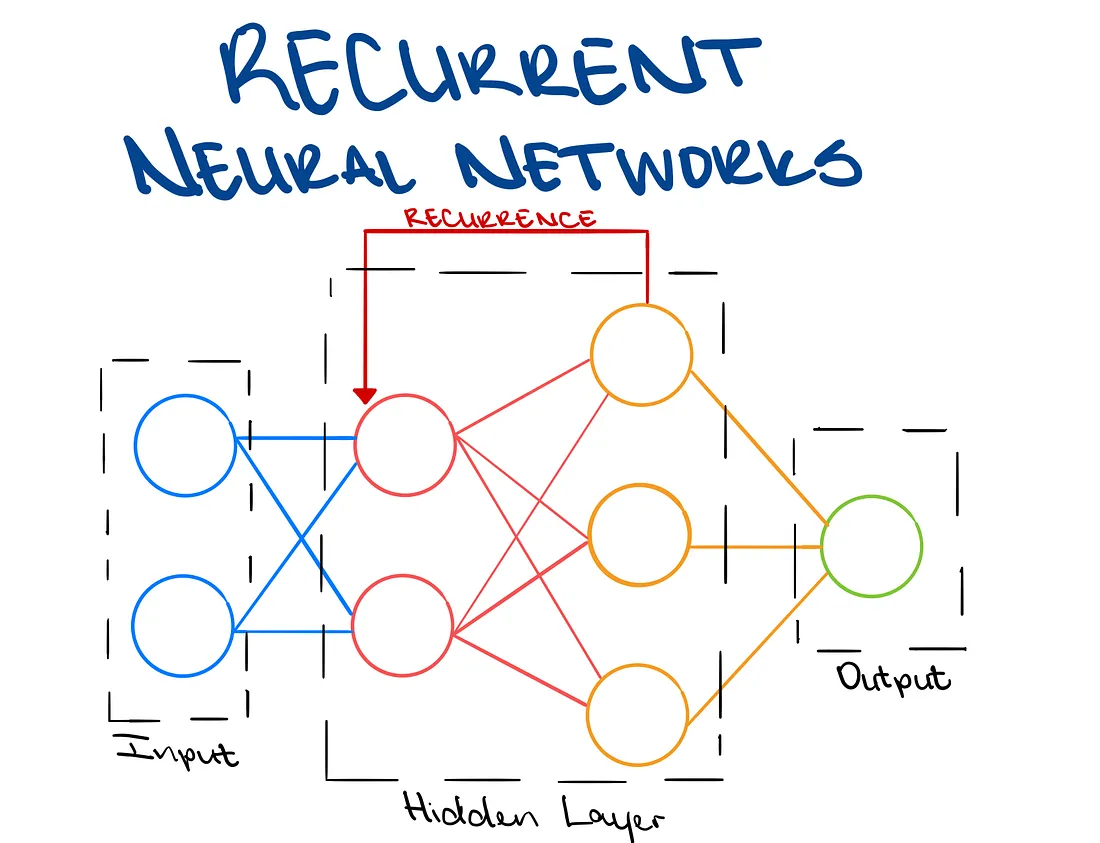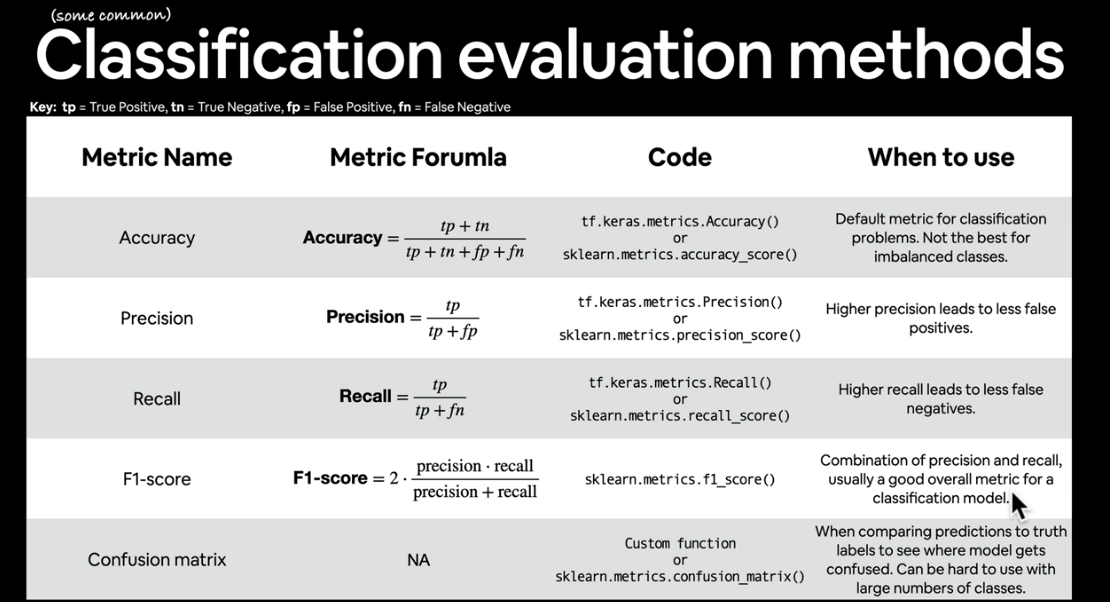)

In [64]:
import tensorflow as tf
from tensorflow.keras import layers

# Create an Bidirectional LSTM-model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding(x)
# First layer, 512 units
x = layers.Bidirectional(layers.LSTM(512, return_sequences=True, dropout=0.3))(x)
# Second layer, 256 units
x = layers.Bidirectional(layers.LSTM(256, return_sequences=True, dropout=0.3))(x)
# Third layer, 128 units
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.3))(x)
# Fourth layer, 64 units
x = layers.Bidirectional(layers.LSTM(64, dropout=0.3))(x)  # No need for return_sequences=True
outputs = layers.Dense(1, activation="sigmoid")(x)

model_4_bidirectional = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional_LSTM")

# Print the model
model_4_bidirectional.summary()

Model: "model_4_Bidirectional_LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 bidirectional_2 (Bidirecti  (None, 15, 1024)          2625536   
 onal)                                                           
                                                                 
 bidirectional_3 (Bidirecti  (None, 15, 512)           2623488   
 onal)                                                           
                                        

In [65]:
# Compile the model
model_4_bidirectional.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [66]:
# Fit the model
model_4_history = model_4_bidirectional.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "model_4_Bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_Bidirectional/20240318-171510
Epoch 1/5
215/215 [==============================] - 24s 58ms/step - loss: 0.1159 - accuracy: 0.9604 - val_loss: 1.0421 - val_accuracy: 0.7743
Epoch 2/5
215/215 [==============================] - 5s 24ms/step - loss: 0.0801 - accuracy: 0.9696 - val_loss: 1.0157 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 5s 21ms/step - loss: 0.0635 - accuracy: 0.9746 - val_loss: 0.8752 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0747 - accuracy: 0.9707 - val_loss: 0.9360 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 4s 19ms/step - loss: 0.0532 - accuracy: 0.9750 - val_loss: 1.2816 - val_accuracy: 0.7651


In [67]:
# Make predictionswith GRU model
model_4_pred_probs = model_4_bidirectional.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 3s 10ms/step


array([[1.6596596e-03],
       [7.6477540e-01],
       [9.9983180e-01],
       [2.7232748e-01],
       [4.7989475e-04],
       [9.9964905e-01],
       [9.7952133e-01],
       [9.9985635e-01],
       [9.9980062e-01],
       [9.4952780e-01]], dtype=float32)

In [68]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds

<tf.Tensor: shape=(762,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0

In [69]:
# Calculate model 3 results
model_4_results = calculate_results(y_true=val_labels,
                                    y_pred=model_3_preds)
model_4_results

{'accuracy': 77.16535433070865,
 'precision': 0.7802322189936542,
 'recall': 0.7716535433070866,
 'f1': 0.7668851665868558}

In [70]:
# Compare with our baseline model :/
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Convolution Neural Networks for Texy (and other types of sequences)

We've used CNNs for images but images are typically 2D (height x width)... however, our text data is 1D.

Previously we've used Conv2D for our image data but now we're going to use Conv1D.

The typical structure of a Conv1D model for sequences (in our case, text):

```
Inputs (text) -> Tokenization -> Embedding -> Layer(s) (typically Conv1D + pooling) -> Outputs (class probabilities)
```

* Differences between "same" and![2024-03-17 (4)_1.png](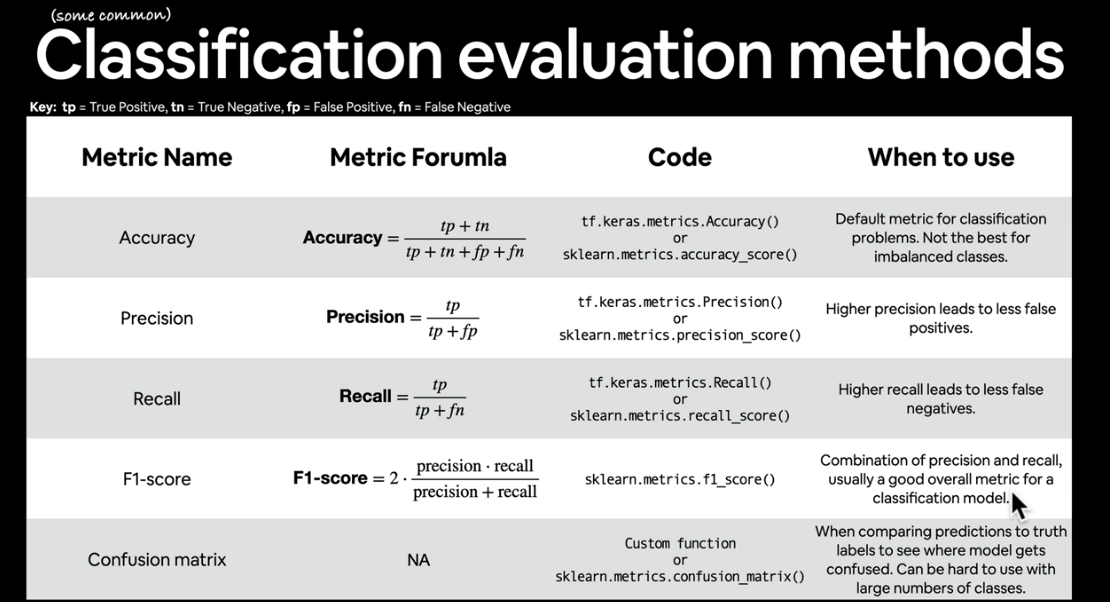![2024-03-17 (4)_1.png](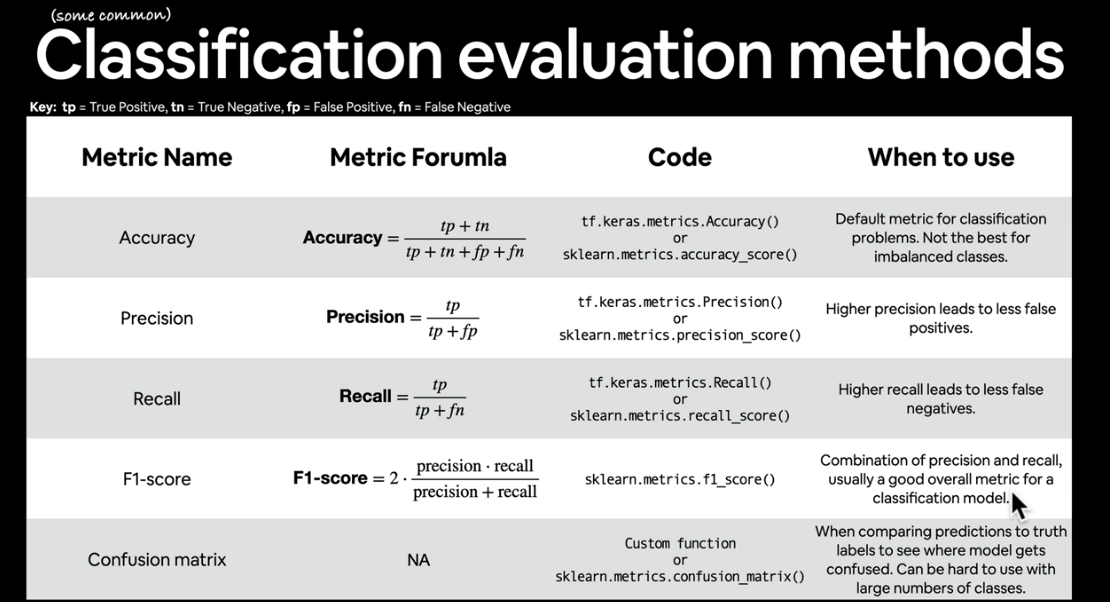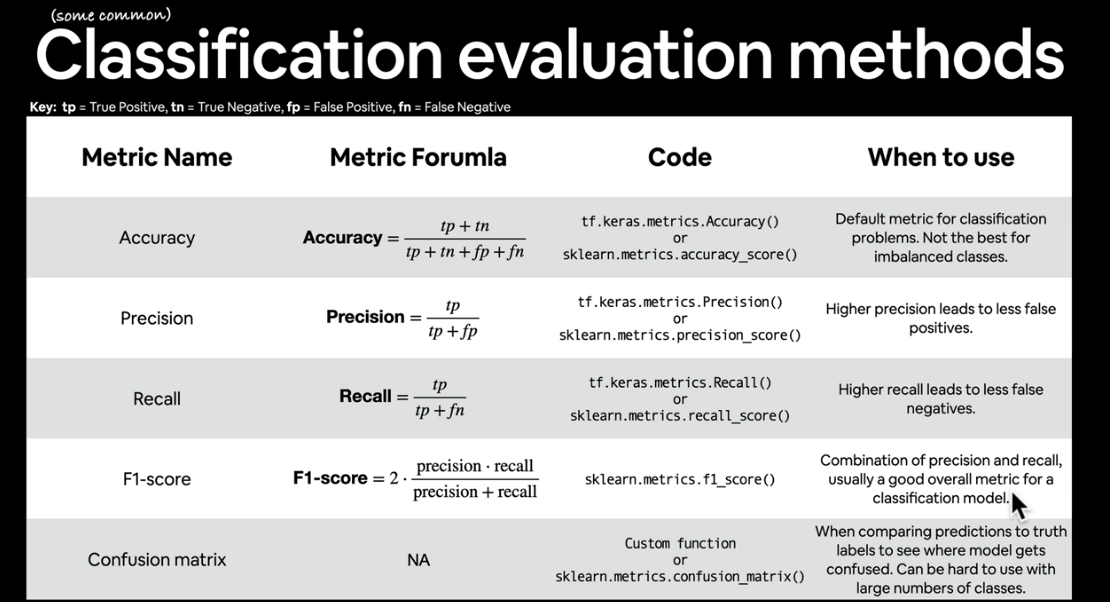)) "valid" [padding](https://stackoverflow.com/questions/37674306/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-t)

## Model 5: Conv1D

In [71]:
# Test out our embedding laer, Conv1D layer and max pooling
from tensorflow.keras import layers
embedding_test = embedding(text_vectorizer(["this is a test sentence"])) #turn tarrget sequenceinto embedding
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=5, # looks at5 words at a time
                        strides=1, # default
                        activation="relu",
                        padding="valid")
coanv_1d_output = conv_1d(embedding_test) # pass test embedding through conv1d layer
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(coanv_1d_output) # equivalent to "get the most important features" or "get the feature with the highest value"

embedding_test.shape, coanv_1d_output.shape, max_pool_output.shape


(TensorShape([1, 15, 128]), TensorShape([1, 11, 32]), TensorShape([1, 32]))

In [72]:
embedding_test

<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.01808384,  0.01454953, -0.07439642, ...,  0.04033634,
          0.02151641,  0.02032699],
        [-0.00049966, -0.06251226, -0.03327853, ...,  0.01321264,
          0.03241929, -0.02159517],
        [ 0.03014308,  0.02113178,  0.01213477, ..., -0.04759546,
          0.01227509,  0.0105404 ],
        ...,
        [ 0.0168133 ,  0.02633739, -0.00834334, ..., -0.04502861,
          0.05717266, -0.02128208],
        [ 0.0168133 ,  0.02633739, -0.00834334, ..., -0.04502861,
          0.05717266, -0.02128208],
        [ 0.0168133 ,  0.02633739, -0.00834334, ..., -0.04502861,
          0.05717266, -0.02128208]]], dtype=float32)>

In [73]:
coanv_1d_output

<tf.Tensor: shape=(1, 11, 32), dtype=float32, numpy=
array([[[0.        , 0.        , 0.01971344, 0.00423207, 0.        ,
         0.        , 0.05736479, 0.        , 0.        , 0.        ,
         0.        , 0.08059472, 0.0762888 , 0.0363873 , 0.0360723 ,
         0.00232353, 0.        , 0.01802634, 0.05062117, 0.11843911,
         0.10924998, 0.        , 0.02944438, 0.        , 0.        ,
         0.03208439, 0.        , 0.04738304, 0.        , 0.        ,
         0.        , 0.        ],
        [0.0203427 , 0.        , 0.03838645, 0.        , 0.        ,
         0.        , 0.01135853, 0.0069694 , 0.0085497 , 0.        ,
         0.        , 0.03809666, 0.0283023 , 0.03090078, 0.07729301,
         0.        , 0.0104538 , 0.02608186, 0.00030348, 0.08605386,
         0.01475917, 0.        , 0.00138535, 0.        , 0.        ,
         0.        , 0.        , 0.07079058, 0.09232873, 0.03557334,
         0.00588389, 0.0217602 ],
        [0.        , 0.04852348, 0.06056294, 0.    

In [74]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.02765525, 0.04852348, 0.06056294, 0.02710565, 0.0271852 ,
        0.03081324, 0.05736479, 0.01925062, 0.0085497 , 0.        ,
        0.01643883, 0.08059472, 0.0762888 , 0.0363873 , 0.07729301,
        0.00232353, 0.0104538 , 0.04867234, 0.05062117, 0.11843911,
        0.10924998, 0.        , 0.02944438, 0.00165011, 0.03682068,
        0.04021421, 0.01509966, 0.08076119, 0.09232873, 0.03779644,
        0.06053014, 0.02967533]], dtype=float32)>

In [75]:
# Create 1-dimensional convolutional layer to model sequences
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(filters=64, kernel_size=5, strides=1, activation="relu", padding="valid")(x)
x = layers.GlobalMaxPool1D()(x)
# x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name="model_5_Conv1D")

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Get a summary of our Conv1D model
model_5.summary()

Model: "model_5_Conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d_1 (Conv1D)           (None, 11, 64)            41024     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 64)                0         
 obalMaxPooling1D)                                               
                                                                 
 dense_5 (Dense)             (None, 1)              

In [76]:
# Fit the model
model_5_history = model_5.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "Conv1D")])

Saving TensorBoard log files to: model_logs/Conv1D/20240318-171556
Epoch 1/5
215/215 [==============================] - 8s 30ms/step - loss: 0.1263 - accuracy: 0.9583 - val_loss: 0.8725 - val_accuracy: 0.7782
Epoch 2/5
215/215 [==============================] - 2s 10ms/step - loss: 0.0771 - accuracy: 0.9720 - val_loss: 1.0056 - val_accuracy: 0.7677
Epoch 3/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0635 - accuracy: 0.9737 - val_loss: 1.0848 - val_accuracy: 0.7585
Epoch 4/5
215/215 [==============================] - 1s 5ms/step - loss: 0.0562 - accuracy: 0.9759 - val_loss: 1.2093 - val_accuracy: 0.7572
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0524 - accuracy: 0.9783 - val_loss: 1.2217 - val_accuracy: 0.7546


In [77]:
# Make some predictions with our Conv1D model
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 2ms/step


array([[5.5374247e-01],
       [9.6556205e-01],
       [9.9991322e-01],
       [7.9346180e-02],
       [1.0186295e-06],
       [9.9885643e-01],
       [6.8089598e-01],
       [9.9998105e-01],
       [9.9999952e-01],
       [9.0576679e-01]], dtype=float32)

In [78]:
# Convert model 5 pred probs to labels
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([1., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [79]:
# Evaluate model 5 predictions
model_5_results = calculate_results(y_true=val_labels,
                                    y_pred=model_5_preds)
model_5_results

{'accuracy': 75.45931758530183,
 'precision': 0.7541438250099668,
 'recall': 0.7545931758530183,
 'f1': 0.7540737922598122}

In [80]:
# Compare to our baseline model
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 'recall': 0.7926509186351706,
 'f1': 0.7862189758049549}

## Model 6: Tensorflow Hub Pretrained Sentence Encoder
[TensorFlow hub](https://www.tensorflow.org/hub)

In [81]:
import tensorflow_hub as hub

embed = hub.load("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2")
embeddings = embed([sample_sentence,
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"])

print(embeddings[0][:50])

tf.Tensor(
[-0.01157028  0.0248591   0.02878048 -0.012715    0.03971538  0.0882776
  0.02680984  0.05589836 -0.0106873  -0.00597291  0.00639323 -0.01819518
  0.00030813  0.09105888  0.05874644 -0.03180628  0.01512474 -0.05162929
  0.00991367 -0.06865347 -0.04209306  0.02678981  0.03011006  0.00321069
 -0.00337973 -0.04787357  0.0226672  -0.00985925 -0.04063613 -0.01292092
 -0.04666384  0.05630299 -0.03949255  0.00517686  0.02495829 -0.0701444
  0.02871508  0.04947684 -0.00633979 -0.08960192  0.02807118 -0.00808364
 -0.01360602  0.0599865  -0.10361787 -0.05195374  0.00232954 -0.02332531
 -0.03758105  0.03327728], shape=(50,), dtype=float32)


In [82]:
embeddings

<tf.Tensor: shape=(3, 512), dtype=float32, numpy=
array([[-0.01157028,  0.0248591 ,  0.02878048, ..., -0.00186124,
         0.02315826, -0.01485021],
       [-0.03133018, -0.06338633, -0.016075  , ..., -0.03242779,
        -0.04575738,  0.05370457],
       [ 0.05080861, -0.01652432,  0.01573779, ...,  0.00976658,
         0.03170121,  0.01788119]], dtype=float32)>

In [83]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [84]:
# Create a model using Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation = "sigmoid")
], name="model_6_USE")

# Compile
model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [85]:
model_6.summary()

Model: "model_6_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256830721 (979.73 MB)
Trainable params: 32897 (128.50 KB)
Non-trainable params: 256797824 (979.61 MB)
_________________________________________________________________


In [86]:
# Train a classifier on top of USE pretrained embeddings
model_6_history = model_6.fit(train_scentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder/20240318-171705
Epoch 1/5
215/215 [==============================] - 5s 11ms/step - loss: 0.5103 - accuracy: 0.7751 - val_loss: 0.4489 - val_accuracy: 0.8031
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4144 - accuracy: 0.8173 - val_loss: 0.4394 - val_accuracy: 0.8084
Epoch 3/5
215/215 [==============================] - 2s 10ms/step - loss: 0.4006 - accuracy: 0.8208 - val_loss: 0.4319 - val_accuracy: 0.8136
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3918 - accuracy: 0.8262 - val_loss: 0.4336 - val_accuracy: 0.8136
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3855 - accuracy: 0.8283 - val_loss: 0.4248 - val_accuracy: 0.8189


In [87]:
# Make predictions with USE TF Hub Model
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.18588404],
       [0.80817246],
       [0.99125165],
       [0.2141863 ],
       [0.75797266],
       [0.77465165],
       [0.9843902 ],
       [0.9836859 ],
       [0.95517594],
       [0.10521637]], dtype=float32)

In [88]:
# Convert prediction probabilities to labels
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [89]:
# Calculate model 6 performance metrics
model_6_results = calculate_results(y_true=val_labels,
                                    y_pred=model_6_preds)
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8193224611745665,
 'recall': 0.8188976377952756,
 'f1': 0.8181405388921442}

## Model 7: TF Hub Pretrained USE but with 10% of training data

🔑 **Note:** Be *very* careful when creating training/val/tests splits that you don't leak data across the datasets, otherwise your model evaluation metrics will be wrong. If something looks to good to be true (a model trained on 10% of the data outperforming the same model trained on 100% of the data) trust your gut and go back through to find where the error may lie.

In [90]:
## NOTE: Making data splits like below leads to data leakage ( model_7 trained on 10% data, outperforms model_6 trained on 100% data)
## DO NOT MAKE DATA SPLITS WICH LEAK DATA FROM VALIDATION/TEST SETS INTO TRAINING SET

# Create subset of 10% of the training data
#train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
#train_scentences_10_percent = train_10_percent["text"].to_list()
#train_labels_10_percent = train_10_percent["target"].to_list()
#len(train_scentences_10_percent), len(train_labels_10_percent)

In [91]:
# Check the number of targets in our subset of data
#train_10_percent["target"].value_counts()

In [92]:
# Making a better dataset spilt (no data leakage)
train_10_percent_split = int(0.1 * len(train_scentences))
train_sentences_10_percent = train_scentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [93]:
# Check the number of each label in the updated training data subset
import numpy as np

pd.Series(np.array(train_labels_10_percent)).value_counts()

0    406
1    279
dtype: int64

In [94]:
# 246, 10:34

In [95]:
train_df_shuffled["target"].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [96]:
# Create a Keras Layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer = hub.KerasLayer("https://www.kaggle.com/models/google/universal-sentence-encoder/frameworks/TensorFlow2/variations/universal-sentence-encoder/versions/2",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False,
                                        name="USE")

In [97]:
# Create a model using Sequential API
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation = "sigmoid")
], name="model_7_USE")

# Compile
model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [98]:
# Train a classifier on top of USE pretrained embeddings
model_7_history = model_7.fit(train_sentences_10_percent,
                              train_labels_10_percent,
                              epochs=5,
                              validation_data=(val_sentences, val_labels),
                              callbacks=[create_tensorboard_callback(SAVE_DIR,
                                                                     "tf_hub_sentence_encoder_10_percent_correct_split")])

Saving TensorBoard log files to: model_logs/tf_hub_sentence_encoder_10_percent_correct_split/20240318-171724
Epoch 1/5
22/22 [==============================] - 3s 43ms/step - loss: 0.6687 - accuracy: 0.7036 - val_loss: 0.6436 - val_accuracy: 0.7546
Epoch 2/5
22/22 [==============================] - 0s 18ms/step - loss: 0.5951 - accuracy: 0.8117 - val_loss: 0.5819 - val_accuracy: 0.7664
Epoch 3/5
22/22 [==============================] - 0s 21ms/step - loss: 0.5174 - accuracy: 0.8190 - val_loss: 0.5284 - val_accuracy: 0.7769
Epoch 4/5
22/22 [==============================] - 0s 20ms/step - loss: 0.4581 - accuracy: 0.8292 - val_loss: 0.5018 - val_accuracy: 0.7782
Epoch 5/5
22/22 [==============================] - 0s 21ms/step - loss: 0.4186 - accuracy: 0.8380 - val_loss: 0.4896 - val_accuracy: 0.7835


In [99]:
# Make predictions with model trained on 10% of the data
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 7ms/step


array([[0.18988247],
       [0.5707957 ],
       [0.91123706],
       [0.36788777],
       [0.4906752 ],
       [0.65631264],
       [0.8842859 ],
       [0.8077173 ],
       [0.8494472 ],
       [0.14002348]], dtype=float32)

In [100]:
# Convert prediction probabilities to labels
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [101]:
# Calculate model 7 performance metrics
model_7_results = calculate_results(y_true=val_labels,
                                    y_pred=model_7_preds)
model_7_results

{'accuracy': 78.34645669291339,
 'precision': 0.7852798248791993,
 'recall': 0.7834645669291339,
 'f1': 0.7815614335205107}

In [102]:
# Compare with model_6
model_6_results

{'accuracy': 81.88976377952756,
 'precision': 0.8193224611745665,
 'recall': 0.8188976377952756,
 'f1': 0.8181405388921442}

## Compare the performance of each of our models

In [103]:
# Combine model results into a dataframe
all_model_results = pd.DataFrame({"0_baseline": baseline_results,
                                  "1_simple_dense": model_1_results,
                                  "2_lstm": model_2_results,
                                  "3_gru": model_3_results,
                                  "4_biderectional": model_4_results,
                                  "5_convid": model_5_results,
                                  "6_tf_hub_use_encoder": model_6_results,
                                  "7_tf_hub_use_encoder_10_percent": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

accuracy  precision    recall        f1
0_baseline                       79.265092   0.811139  0.792651  0.786219
1_simple_dense                   78.477690   0.789165  0.784777  0.781896
2_lstm                           77.296588   0.774052  0.772966  0.771216
3_gru                            77.165354   0.780232  0.771654  0.766885
4_biderectional                  77.165354   0.780232  0.771654  0.766885
5_convid                         75.459318   0.754144  0.754593  0.754074
6_tf_hub_use_encoder             81.889764   0.819322  0.818898  0.818141
7_tf_hub_use_encoder_10_percent  78.346457   0.785280  0.783465  0.781561

insert 2024-03-17 (4)_1.png


In [111]:
# Reduce the accuracy to the same scale as the other metrics
all_model_results.loc["accuracy"] = all_model_results.loc["accuracy"]/100
all_model_results

0_baseline  1_simple_dense    2_lstm     3_gru  4_biderectional  \
accuracy     0.792651        0.784777  0.772966  0.771654         0.771654   
precision    0.811139        0.789165  0.774052  0.780232         0.780232   
recall       0.792651        0.784777  0.772966  0.771654         0.771654   
f1           0.786219        0.781896  0.771216  0.766885         0.766885   

           5_convid  6_tf_hub_use_encoder  7_tf_hub_use_encoder_10_percent  
accuracy   0.754593              0.818898                         0.783465  
precision  0.754144              0.819322                         0.785280  
recall     0.754593              0.818898                         0.783465  
f1         0.754074              0.818141                         0.781561

                                 accuracy  precision    recall        f1
0_baseline                       0.792651   0.811139  0.792651  0.786219
1_simple_dense                   0.784777   0.789165  0.784777  0.781896
2_lstm                           0.772966   0.774052  0.772966  0.771216
3_gru                            0.771654   0.780232  0.771654  0.766885
4_biderectional                  0.771654   0.780232  0.771654  0.766885
5_convid                         0.754593   0.754144  0.754593  0.754074
6_tf_hub_use_encoder             0.818898   0.819322  0.818898  0.818141
7_tf_hub_use_encoder_10_percent  0.783465   0.785280  0.783465  0.781561


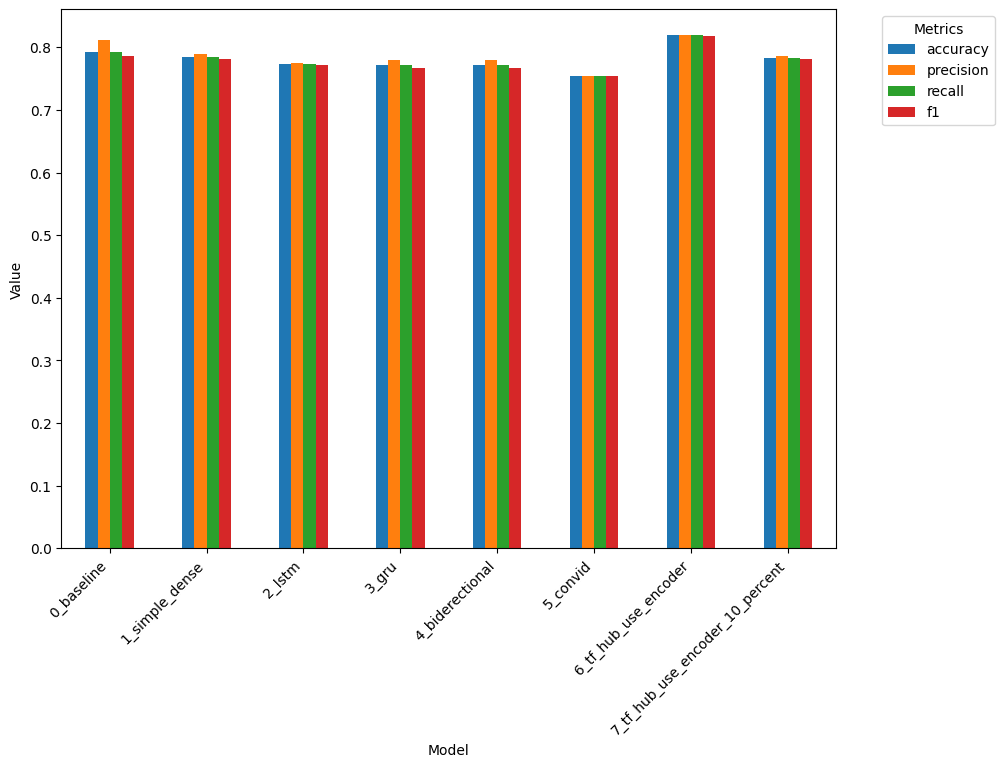

In [121]:
# Assuming we have a DataFrame where the columns are model names and the rows are metrics
# We transpose it to get the model names as the index
plot_df = all_model_results.transpose()

# Now that the DataFrame is transposed, plot the results
ax = plot_df.plot(kind="bar", figsize=(10, 7))
ax.set_ylabel("Value")  # Set a y-axis label
ax.set_xlabel("Model")  # Set an x-axis label
plt.xticks(rotation=45, ha="right")  # Rotate the text for x-axis labels for better readability
plt.legend(title="Metrics", bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend outside the plot

plt.show()